In [48]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import networkx as nx
import os
import random

In [2]:
DFAllFirms = pd.read_csv(
    "/Users/SatouDaisuke/Documents/gsais/dataAnalysis/data/KJDATA1.TXT",
    encoding='cp932')
DFAllKyotoFirms = pd.read_excel(
    "/Users/SatouDaisuke/Documents/gsais/dataAnalysis/data/KJDATA_allKyotoCompanies.xlsx",
    sheet_name="original")
DFAllTrade = pd.read_csv(
    "/Users/SatouDaisuke/Documents/gsais/dataAnalysis/data/SKDATA.TXT")
DFTreeAllKyotofirms = pd.read_csv(
    "/Users/SatouDaisuke/Documents/gsais/dataAnalysis/data/module/allKyotoFirms.csv",
    encoding='cp932')

In [276]:
MODULES = ["3:1:1:", "3:1:30:", "3:7:", "1:10:", "2:10:"]
MODULES_DESC = ["Nishijin silk fablicks", "Kyoyuzen dyeing", "Kyoto doll", "Electronics", "Civil engineering"]

In [6]:
def get_infofirms_from_module(module):
    """
    与えたれたモジュール番号を元に、そのモジュールに存在する企業データを返します。
    
    args: module string モジュール番号
    
    return DF => モジュールに存在する企業データ
    """
    cols = DFAllFirms.columns
    df = pd.DataFrame(index=[], columns=cols)
    
    infofirms = DFTreeAllKyotofirms[DFTreeAllKyotofirms["module"].str.startswith(module)]
    
    for companycode in infofirms["CompanyCode"]:
        record = find_company(companycode)
        df = df.append(record, ignore_index=True)
    
    return df

In [3]:
def make_tradedata(firms):
    """
    企業データを持ったdfを元に、dfに存在する全ての企業が関係する取引を返すメソッド
    
    args: firms DF
    
    return DF => 取引関係を持つ企業を返す
    """
    a = DFAllTrade[DFAllTrade["企業コード"].isin(firms["企業コード"])]
    b = DFAllTrade[DFAllTrade["取引先コード"].isin(firms["企業コード"])]

    c = pd.concat([a, b])


    d = c[~c.duplicated()]
    
    print(len(d))

    return d[["企業コード", "取引先コード"]]

In [7]:
def make_tradedata_only_kyoto(infofirms, module):
    """
    企業データを持ったdfを元に、dfに存在する全ての企業同士の取引を返すメソッド
    
    args: infofirms DF
    
    return DF => 取引関係を持つ企業を返す
    """
    tradeData = DFAllTrade[DFAllTrade["企業コード"].isin(infofirms["企業コード"]) & DFAllTrade["取引先コード"].isin(infofirms["企業コード"])] 
    
    # リンクたちをエクセル表に出力
    new_dir = "/Users/SatouDaisuke/Documents/gsais/dataAnalysis/data/smallnetwork"
    if not os.path.exists(new_dir):
        os.mkdir(new_dir)
    
    module = module.replace(":", "-")
    tradeData.to_excel("/Users/SatouDaisuke/Documents/gsais/dataAnalysis/data/smallnetwork/{}リンク.xlsx".format(module))
    
    # ノードたちをエクセル表に出力
    firms = list(set(list(tradeData["企業コード"]) + list(tradeData["取引先コード"])))
    print("{}node数: {}".format(module, len(firms)))
    df = pd.DataFrame(firms)
    df.to_excel("/Users/SatouDaisuke/Documents/gsais/dataAnalysis/data/smallnetwork//{}ノード.xlsx".format(module))
    
    return tradeData[["企業コード", "取引先コード"]]

In [4]:
def make_tuple_from_dataframe(df):
    """
    dataframeの行からtupleを生み出す
    """
    tuples = [tuple(x) for x in df.values]
    return tuples

In [5]:
def get_graph_from_tuple(tuples):
    """
    tupleからデータオブジェクトを生み出し、それぞれのノードが持つ次数を返す。
    
    args: tuples []tuple
    
    return dictionary ノードとそれに対応する次数を返す
    """
    G = nx.DiGraph()
    G.add_edges_from(tuples)
    
    return G

In [9]:
def get_graph(module, makeOption):
    """
    This function returns directed graph object based on given module and function for making trade data.
    
    args
    
    return 
    
    """
    infofirms = get_infofirms_from_module(module)
    tradedata = makeOption(infofirms, module)
    tuples = make_tuple_from_dataframe(tradedata)
    G = get_graph_from_tuple(tuples)
    return G

In [44]:
count = 0
for component in scc:
    if len(component) > 3:
        print(component)
        count += 1

{291116922, 291070892, 630061300, 641080565}
{641210418, 650007042, 790020157, 641085079}
{295877570, 641056419, 290351499, 641268912, 500092656, 570198461}
{570225280, 570083621, 570065542, 641150407}
{480010080, 12546291, 290252989, 480055670}
{641089600, 290890438, 600079422, 641400799}
{295715561, 641511850, 642012490, 570226864, 291326544, 641386389}
{641063970, 401196151, 662191846, 430160518, 510065074, 630019703, 620112638, 710163967}
{641007620, 641204230, 641171463, 650182669, 641400845, 641433620, 670105627, 641237022, 641105959, 291012647, 291373100, 641105967, 641433654, 650182715, 641269820, 290062411, 571211852, 641335385, 322076765, 650084446, 600113248, 670072931, 642089060, 840040547, 291176550, 641106025, 610009206, 641007736, 570228875, 640024718, 650051726, 670072974, 570130581, 640024734, 350159017, 730005674, 641237162, 641007787, 641269943, 641106114, 470122692, 570163404, 641073364, 640024793, 650051807, 570065119, 641401060, 675152100, 640024807, 641007850, 64

In [46]:
count

52

In [11]:
def find_company(company_code):
    df = DFAllFirms[DFAllFirms["企業コード"] == company_code]
    return df

In [71]:
df3_1_1 = get_infofirms_from_module("3:1:1:")
df3_1_30 = get_infofirms_from_module("3:1:30:")
df3_7 = get_infofirms_from_module("3:7:")
df1_10 = get_infofirms_from_module("1:10:")
df2_10 = get_infofirms_from_module("2:10:")

In [58]:
df3_1_1.head()

,メンテナンス区分,企業コード,法人格前後区分,法人格略コード,漢字商号,企業住所コード＿ＴＳＲ住所コード,企業郵便番号,企業所在地,企業電話番号,上場区分,...,当期決算＿税込引区分,当期決算＿利益金（千円）,当期決算＿配当,余白２,インデックスカナ商号,余白３,役職コード,代表者氏名,生年月日（西暦）,企業所在地バーコード情報
0,0,641080727,1,1,（株）川中,520161601,602-8446,京都市上京区五辻通大宮西入五辻町５７,075 431 0101,9,...,,-135256,-,,ｶﾜﾅｶ,,1,川中 粲,19380227,<602844657***********\>
1,0,641085346,2,1,やまと（株）,520562312,600-8433,京都市下京区高辻通室町西入ル繁昌町２８８,075 341 6221,9,...,,,-,,ﾔﾏﾄ,,1,中村 裕,19490623,<6008433288**********8>
2,0,641082959,2,1,木村卯兵衛（株）,520165110,602-8214,京都市上京区大宮通元誓願寺下ル北之御門町５６８,075 441 0131,9,...,,38696,-,,ｷﾑﾗｳﾍｴ,,1,木村 正也,,<6028214568**********8>
3,0,641090030,2,1,とみや織物（株）,520166007,602-0000,京都市上京区七本松通中立売上ル一観音町４２８,075 463 1234,9,...,,-84686,-,,ﾄﾐﾔｵﾘﾓﾉ,,1,冨家 靖久,,
4,0,290009642,2,1,市田（株）,350202902,103-0012,東京都中央区日本橋堀留町２－３－１４,03 36396271,9,...,,-143721,-,,ｲﾁﾀﾞ,,1,日吉 龍二,19521113,<10300122-3-14*******@>


In [59]:
df3_1_1.describe()

,メンテナンス区分,企業コード,法人格前後区分,法人格略コード,漢字商号,企業住所コード＿ＴＳＲ住所コード,企業郵便番号,企業所在地,企業電話番号,上場区分,...,当期決算＿税込引区分,当期決算＿利益金（千円）,当期決算＿配当,余白２,インデックスカナ商号,余白３,役職コード,代表者氏名,生年月日（西暦）,企業所在地バーコード情報
count,121,121,121,121,121,121,121,121,121,121,...,121,121,121,121,121,121,121,121,121,121
unique,1,121,3,3,121,109,107,120,119,2,...,2,35,3,1,121,1,3,120,108,115
top,0,910075646,1,1,勝山織物（株）,520165110,602-0000,京都市上京区大宮通一条上ル西入栄町６７７,,9,...,,,-,,ﾚﾃﾞｲｽｷﾖ,,1,橋本 博之,,
freq,121,1,67,95,1,3,5,2,3,120,...,118,84,119,121,1,121,109,2,13,5


In [75]:
firms3_1_1 = list(df3_1_1["企業コード"])
firms3_1_30 = list(df3_1_30["企業コード"])
firms3_7 = list(df3_7["企業コード"])
firms1_10 = list(df1_10["企業コード"])
firms2_10 = list(df2_10["企業コード"])
firms = [firms3_1_1, firms3_1_30, firms3_7, firms1_10, firms2_10]

In [61]:
firms3_1_1

[641080727,
 641085346,
 641082959,
 641090030,
 290009642,
 641119178,
 641128657,
 295965029,
 641124112,
 641125500,
 641312784,
 641142293,
 641089570,
 641091443,
 641094914,
 641199066,
 202001504,
 641091788,
 641087837,
 641222599,
 641517580,
 641120290,
 641313365,
 641142420,
 870092006,
 641157967,
 322283434,
 641097735,
 641094388,
 641119054,
 641171757,
 641312814,
 641080735,
 641158840,
 641370300,
 291028470,
 641139438,
 641090900,
 641373031,
 642186910,
 641383835,
 641299052,
 641152353,
 641115318,
 641126786,
 570061814,
 580185303,
 220129274,
 641199775,
 340225084,
 641224265,
 642190917,
 641418426,
 641211872,
 641169710,
 641126760,
 570279780,
 910075646,
 641388705,
 10169245,
 641417845,
 291005063,
 290222486,
 400849208,
 291294715,
 670096628,
 575476362,
 291074499,
 641299796,
 620066547,
 293210853,
 641366108,
 641372337,
 510056768,
 641402678,
 641404018,
 641158238,
 641430329,
 641174250,
 60002034,
 641380410,
 641403640,
 641245670,
 64114

In [126]:
def detect_scc_include_community(firms):
    """
    企業のリストからその企業群の企業が一つでも存在するsccを判定する
    
    args: firms:List<int>
    
    return: Unit
    """
    components = []
    for component in scc:
        if len(component) > 3:
            for firmCode in component:
                if firmCode in firms:
                    if component not in components:
                        components.append(component)

    print("sccの数は:" + str(len(components)))
    print("このsccの長さは:" + str(len(components[0])))
    print(components)

In [127]:
detect_scc_include_community(firms3_1_1)

sccの数は:1
このsccの長さは:8765
[{641007620, 641204230, 641171463, 650182669, 641400845, 641433620, 670105627, 641237022, 641105959, 291012647, 291373100, 641105967, 641433654, 650182715, 641269820, 290062411, 571211852, 641335385, 322076765, 650084446, 600113248, 670072931, 642089060, 840040547, 291176550, 641106025, 610009206, 641007736, 570228875, 640024718, 650051726, 670072974, 570130581, 640024734, 350159017, 730005674, 641237162, 641007787, 641269943, 641106114, 470122692, 570163404, 641073364, 640024793, 650051807, 570065119, 641401060, 675152100, 640024807, 641007850, 641171692, 641106157, 640024815, 570163439, 570654963, 641237235, 641106165, 641237243, 641138946, 641335555, 641007876, 570228999, 641007884, 641204493, 410091790, 641401108, 640024858, 350093598, 641204515, 641368356, 740000039, 641171757, 641401140, 812024133, 710050119, 570130760, 570196299, 641204558, 641270100, 642187606, 641106262, 640024920, 570949980, 641007973, 641040750, 641106289, 641433972, 592019829, 402424

In [128]:
detect_scc_include_community(firms3_1_30)

sccの数は:1
このsccの長さは:8765
[{641007620, 641204230, 641171463, 650182669, 641400845, 641433620, 670105627, 641237022, 641105959, 291012647, 291373100, 641105967, 641433654, 650182715, 641269820, 290062411, 571211852, 641335385, 322076765, 650084446, 600113248, 670072931, 642089060, 840040547, 291176550, 641106025, 610009206, 641007736, 570228875, 640024718, 650051726, 670072974, 570130581, 640024734, 350159017, 730005674, 641237162, 641007787, 641269943, 641106114, 470122692, 570163404, 641073364, 640024793, 650051807, 570065119, 641401060, 675152100, 640024807, 641007850, 641171692, 641106157, 640024815, 570163439, 570654963, 641237235, 641106165, 641237243, 641138946, 641335555, 641007876, 570228999, 641007884, 641204493, 410091790, 641401108, 640024858, 350093598, 641204515, 641368356, 740000039, 641171757, 641401140, 812024133, 710050119, 570130760, 570196299, 641204558, 641270100, 642187606, 641106262, 640024920, 570949980, 641007973, 641040750, 641106289, 641433972, 592019829, 402424

In [129]:
detect_scc_include_community(firms3_7)

sccの数は:1
このsccの長さは:8765
[{641007620, 641204230, 641171463, 650182669, 641400845, 641433620, 670105627, 641237022, 641105959, 291012647, 291373100, 641105967, 641433654, 650182715, 641269820, 290062411, 571211852, 641335385, 322076765, 650084446, 600113248, 670072931, 642089060, 840040547, 291176550, 641106025, 610009206, 641007736, 570228875, 640024718, 650051726, 670072974, 570130581, 640024734, 350159017, 730005674, 641237162, 641007787, 641269943, 641106114, 470122692, 570163404, 641073364, 640024793, 650051807, 570065119, 641401060, 675152100, 640024807, 641007850, 641171692, 641106157, 640024815, 570163439, 570654963, 641237235, 641106165, 641237243, 641138946, 641335555, 641007876, 570228999, 641007884, 641204493, 410091790, 641401108, 640024858, 350093598, 641204515, 641368356, 740000039, 641171757, 641401140, 812024133, 710050119, 570130760, 570196299, 641204558, 641270100, 642187606, 641106262, 640024920, 570949980, 641007973, 641040750, 641106289, 641433972, 592019829, 402424

In [130]:
detect_scc_include_community(firms1_10)

sccの数は:1
このsccの長さは:8765
[{641007620, 641204230, 641171463, 650182669, 641400845, 641433620, 670105627, 641237022, 641105959, 291012647, 291373100, 641105967, 641433654, 650182715, 641269820, 290062411, 571211852, 641335385, 322076765, 650084446, 600113248, 670072931, 642089060, 840040547, 291176550, 641106025, 610009206, 641007736, 570228875, 640024718, 650051726, 670072974, 570130581, 640024734, 350159017, 730005674, 641237162, 641007787, 641269943, 641106114, 470122692, 570163404, 641073364, 640024793, 650051807, 570065119, 641401060, 675152100, 640024807, 641007850, 641171692, 641106157, 640024815, 570163439, 570654963, 641237235, 641106165, 641237243, 641138946, 641335555, 641007876, 570228999, 641007884, 641204493, 410091790, 641401108, 640024858, 350093598, 641204515, 641368356, 740000039, 641171757, 641401140, 812024133, 710050119, 570130760, 570196299, 641204558, 641270100, 642187606, 641106262, 640024920, 570949980, 641007973, 641040750, 641106289, 641433972, 592019829, 402424

In [131]:
detect_scc_include_community(firms2_10)

sccの数は:1
このsccの長さは:8765
[{641007620, 641204230, 641171463, 650182669, 641400845, 641433620, 670105627, 641237022, 641105959, 291012647, 291373100, 641105967, 641433654, 650182715, 641269820, 290062411, 571211852, 641335385, 322076765, 650084446, 600113248, 670072931, 642089060, 840040547, 291176550, 641106025, 610009206, 641007736, 570228875, 640024718, 650051726, 670072974, 570130581, 640024734, 350159017, 730005674, 641237162, 641007787, 641269943, 641106114, 470122692, 570163404, 641073364, 640024793, 650051807, 570065119, 641401060, 675152100, 640024807, 641007850, 641171692, 641106157, 640024815, 570163439, 570654963, 641237235, 641106165, 641237243, 641138946, 641335555, 641007876, 570228999, 641007884, 641204493, 410091790, 641401108, 640024858, 350093598, 641204515, 641368356, 740000039, 641171757, 641401140, 812024133, 710050119, 570130760, 570196299, 641204558, 641270100, 642187606, 641106262, 640024920, 570949980, 641007973, 641040750, 641106289, 641433972, 592019829, 402424

### Todo
- それぞれのコミュニティにSCC構造が存在するかを確認する。

In [33]:
def get_scc_length(scc):
    """
    returns given scc length which includes more than two companies
    
    """
    scc_len = []
    for s in scc:
        if len(s) > 1:
            scc_len.append(len(s))
    return sorted(scc_len, reverse=True)

In [39]:
def get_scc_info(module):
    """
    
    """
    G = get_graph(module, make_tradedata_only_kyoto)
    scc = list(nx.strongly_connected_components(G))
    largest = max(nx.strongly_connected_components(G), key=len)
    scc_len = get_scc_length(scc)
    print("最も大きいSCCに所属する企業数は", len(largest))
    print("二つ以上の企業を有するsccのそれぞれの企業数の配列", scc_len)

In [50]:
get_scc_info("3:1:1:")
print("##############################")
get_scc_info("3:1:30:")
print("##############################")
get_scc_info("3:7:")
print("##############################")
get_scc_info("1:10:")
print("##############################")
get_scc_info("2:10:")
print("##############################")

3-1-1-node数: 121
最も大きいSCCに所属する企業数は 30
二つ以上の企業を有するsccのそれぞれの企業数の配列 [30, 4]
##############################
3-1-30-node数: 31
最も大きいSCCに所属する企業数は 6
二つ以上の企業を有するsccのそれぞれの企業数の配列 [6]
##############################
3-7-node数: 105
最も大きいSCCに所属する企業数は 23
二つ以上の企業を有するsccのそれぞれの企業数の配列 [23, 2, 2]
##############################
1-10-node数: 173
最も大きいSCCに所属する企業数は 20
二つ以上の企業を有するsccのそれぞれの企業数の配列 [20, 2, 2]
##############################
2-10-node数: 65
最も大きいSCCに所属する企業数は 5
二つ以上の企業を有するsccのそれぞれの企業数の配列 [5]
##############################


In [43]:
# 京都全体のSCCの概要
print("京都の企業ネットワークのSCCに関する概要です")

tradeData = make_tradedata(DFAllKyotoFirms)
tuples = make_tuple_from_dataframe(tradeData)
G = get_graph_from_tuple(tuples)
scc = list(nx.strongly_connected_components(G))

largest = max(nx.strongly_connected_components(G), key=len)
scc_len = get_scc_length(scc)

print("最も大きいSCCに所属する企業数は", len(largest))
print("二つ以上の企業を有するsccの数は", len(scc_len))
print("二つ以上の企業を有するscc", scc_len)


京都の企業ネットワークのSCCに関する概要です
157974
最も大きいSCCに所属する企業数は 8765
二つ以上の企業を有するsccの数は 793
二つ以上の企業を有するscc [8765, 14, 11, 10, 8, 8, 8, 8, 7, 7, 7, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

### TODO
- bow-tie分析のアルゴリズムを書く(グラフを渡すとin, out, scc, tendrils, tube, other)
- 京都全体のネットワークの最大のSCCに関してbow-tie分析を適用 -> 数とその比率をだす。各産業のノードとの被りをみる
- それぞれの産業コミュニティに関してSCC分析を適用

In [113]:
def bowtie_analysis(G):
    """
    to separate given graph with scc in out tube tendrils other
    """
    scc = max(nx.strongly_connected_components(G), key=len)
    scc  = set(scc)
    nodes = set(G.nodes())
    scc_node = random.sample(scc, 1)[0]
    sp = dict(nx.all_pairs_shortest_path_length(G))
    inc = set()
    for n in nodes:
        if scc_node in sp[n]:
            inc.add(n)
    inc -= scc
    
    outc = set()
    for n in scc:
        outc |= set(sp[n].keys())
    outc -= scc
    
    tube = set()
    out_tendril = set()
    in_tendril = set()
    other = set()
    
    remainder = set(G.nodes()) - scc - inc - outc
    inc_out = set()
    for n in inc:
        inc_out |= set(sp[n].keys())
    inc_out = inc_out - inc - scc - outc
    
    for n in remainder:
        if n in inc_out:
            if set(sp[n].keys()) & outc:
                tube.add(n)
            else:
                in_tendril.add(n)
        elif set(sp[n].keys()) & outc:
            out_tendril.add(n)
        else:
            other.add(n)
    
    print("SCCの大きさは", len(scc))
    print("INの大きさは", len(inc))
    print("OUTの大きさは", len(outc))
    print("TUBEの大きさは", len(tube))
    print("IN_TENDRILSの大きさは", len(in_tendril))
    print("OUT_TENDRILSの大きさは", len(out_tendril))
    print("OTHERの大きさは", len(other))
    
    return scc, inc, outc, tube, in_tendril, out_tendril, other

In [221]:
def culculate_bow_tie_ratio(scc, inc, outc, tube, in_tendril, out_tendril, other, G):
    nodes = set(G.nodes())
    G_scc = nodes & scc
    G_inc = nodes & inc
    G_outc = nodes & outc
    G_tube = nodes & tube
    G_intendril = nodes & in_tendril
    G_outtendril = nodes & out_tendril
    G_other = nodes & other
    
    nodes = G_scc | G_inc | G_outc | G_tube | G_intendril | G_outtendril | G_other
    
    scc_ratio = len(G_scc) / len(nodes)
    inc_ratio = len(G_inc) / len(nodes)
    outc_ratio = len(G_outc) / len(nodes)
    tube_ratio = len(G_tube) / len(nodes)
    intendril_ratio = len(G_intendril) / len(nodes)
    outtendril_ratio = len(G_outtendril) / len(nodes)
    other_ratio = len(G_other) / len(nodes)
    
    print("SCCの割合は{:.2%}".format(scc_ratio))
    print("INの割合は{:.2%}".format(inc_ratio))
    print("OUTの割合は{:.2%}".format(outc_ratio))
    print("TUBEの割合は{:.2%}".format(tube_ratio))
    print("IN_TENDRILSの割合は{:.2%}".format(intendril_ratio))
    print("OUT_TENDRILSの割合は{:.2%}".format(outtendril_ratio))
    print("OTHERの割合は{:.2%}".format(other_ratio))
    
    return scc_ratio, inc_ratio, outc_ratio, tube_ratio, intendril_ratio, outtendril_ratio, other_ratio

In [300]:
"""京都全体のbow-tie構造を分析"""
tradeData = make_tradedata(DFAllKyotoFirms)
tuples = make_tuple_from_dataframe(tradeData)
G = get_graph_from_tuple(tuples)
scc, inc, outc, tube, in_tendril, out_tendril, other = bowtie_analysis(G)
scc_ratio, inc_ratio, outc_ratio, tube_ratio, intendril_ratio, outtendril_ratio, other_ratio = culculate_bow_tie_ratio(scc, inc, outc, tube, in_tendril, out_tendril, other, graph)

scc_l = []
inc_l = []
outc_l = []
tube_l = []
intendril_l = []
outtendril_l = []
other_l = []

info_each_community = []

for i, m in enumerate(MODULE):
    graph = get_graph(m, make_tradedata_only_kyoto)
    print("\n========================================")
    scc_ratio, inc_ratio, outc_ratio, tube_ratio, intendril_ratio, outtendril_ratio, other_ratio = culculate_bow_tie_ratio(scc, inc, outc, tube, in_tendril, out_tendril, other, graph)
    print("\n========================================")
    scc_l.append(scc_ratio)
    inc_l.append(inc_ratio)
    outc_l.append(outc_ratio)
    tube_l.append(tube_ratio)
    intendril_l.append(intendril_ratio)
    outtendril_l.append(outtendril_ratio)
    other_l.append(other_ratio)
    
    info_each_community.append({m: [scc_ratio, inc_ratio, outc_ratio, tube_ratio, intendril_ratio, outtendril_ratio, other_ratio]})


157974
SCCの大きさは 8765
INの大きさは 42066
OUTの大きさは 9297
TUBEの大きさは 578
IN_TENDRILSの大きさは 7188
OUT_TENDRILSの大きさは 7884
OTHERの大きさは 4730
3-1-1-node数: 121

SCCの割合は37.19%
INの割合は55.37%
OUTの割合は6.61%
TUBEの割合は0.00%
IN_TENDRILSの割合は0.00%
OUT_TENDRILSの割合は0.83%
OTHERの割合は0.00%

3-1-30-node数: 31

SCCの割合は29.03%
INの割合は58.06%
OUTの割合は9.68%
TUBEの割合は0.00%
IN_TENDRILSの割合は3.23%
OUT_TENDRILSの割合は0.00%
OTHERの割合は0.00%

3-7-node数: 105

SCCの割合は14.29%
INの割合は56.19%
OUTの割合は9.52%
TUBEの割合は0.00%
IN_TENDRILSの割合は12.38%
OUT_TENDRILSの割合は3.81%
OTHERの割合は3.81%

1-10-node数: 173

SCCの割合は11.56%
INの割合は81.50%
OUTの割合は4.62%
TUBEの割合は0.00%
IN_TENDRILSの割合は1.16%
OUT_TENDRILSの割合は1.16%
OTHERの割合は0.00%

2-10-node数: 65

SCCの割合は7.69%
INの割合は73.85%
OUTの割合は13.85%
TUBEの割合は0.00%
IN_TENDRILSの割合は0.00%
OUT_TENDRILSの割合は4.62%
OTHERの割合は0.00%



In [268]:
def plot_pie_graph(scc, inc, outc, tube, in_tendril, out_tendril, other, graph):
    scc_ratio, inc_ratio, outc_ratio, tube_ratio, intendril_ratio, outtendril_ratio, other_ratio = culculate_bow_tie_ratio(scc, inc, outc, tube, in_tendril, out_tendril, other, graph)
    x = np.array([scc_ratio, inc_ratio, outc_ratio, tube_ratio, intendril_ratio, outtendril_ratio, other_ratio])
    label = ["SCC", "IN", "OUT", "TUBE", "IN_TENDRIL", "OUT_TENDRIL", "OTHER"]
    plt.pie(x, counterclock=False, startangle=90, autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 5 else "", textprops={"color": "white",'weight': "bold"},  pctdistance=0.8)
    plt.subplots_adjust(left=0,right=0.7)
    plt.legend(label,fancybox=True,loc='center left',bbox_to_anchor=(0.9,0.5))
    
    centre_circle = plt.Circle((0,0),0.6,color='black', fc='white',linewidth=1.25)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    fig.show()

In [281]:
def plot_bar(scc, inc, outc, tube, in_tendril, out_tendril, other, graph):
    scc_ratio, inc_ratio, outc_ratio, tube_ratio, intendril_ratio, outtendril_ratio, other_ratio = culculate_bow_tie_ratio(scc, inc, outc, tube, in_tendril, out_tendril, other, graph)
    x = np.array(["scc", "in", "out", "tube", "in_tendril", "out_tendril", "other"])
    y = np.array([scc_ratio, inc_ratio, outc_ratio, tube_ratio, intendril_ratio, outtendril_ratio, other_ratio])
    plt.bar(x, y)

In [291]:
def draw_pie_graph(module_num):
    G = get_graph(MODULES[module_num], make_tradedata_only_kyoto)
    scc, inc, outc, tube, in_tendril, out_tendril, other = bowtie_analysis(G)
    plot_pie_graph(scc, inc, outc, tube, in_tendril, out_tendril, other,  G)
    plt.title("A bow-tie strucrue of firm relationship network of {}".format(MODULES_DESC[module_num]))

In [284]:
def draw_bar(module_num):
    G = get_graph(MODULES[module_num], make_tradedata_only_kyoto)
    scc, inc, outc, tube, in_tendril, out_tendril, other = bowtie_analysis(G)
    plot_bar(scc, inc, outc, tube, in_tendril, out_tendril, other,  G)
    plt.title("A bow-tie strucrue of firm relationship network of {}".format(MODULES_DESC[module_num]))
    plt.xlabel("element of bow-tie")
    plt.ylabel("percentage")

3-1-1-node数: 121
SCCの大きさは 30
INの大きさは 74
OUTの大きさは 13
TUBEの大きさは 1
IN_TENDRILSの大きさは 1
OUT_TENDRILSの大きさは 2
OTHERの大きさは 0
SCCの割合は24.79%
INの割合は61.16%
OUTの割合は10.74%
TUBEの割合は0.83%
IN_TENDRILSの割合は0.83%
OUT_TENDRILSの割合は1.65%
OTHERの割合は0.00%


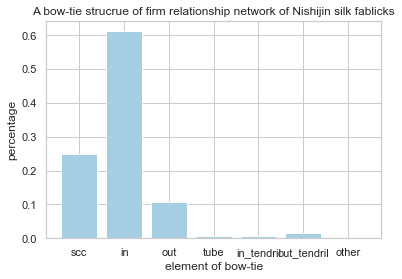

In [285]:
draw_bar(0)

3-1-30-node数: 31
SCCの大きさは 6
INの大きさは 19
OUTの大きさは 5
TUBEの大きさは 0
IN_TENDRILSの大きさは 1
OUT_TENDRILSの大きさは 0
OTHERの大きさは 0
SCCの割合は19.35%
INの割合は61.29%
OUTの割合は16.13%
TUBEの割合は0.00%
IN_TENDRILSの割合は3.23%
OUT_TENDRILSの割合は0.00%
OTHERの割合は0.00%


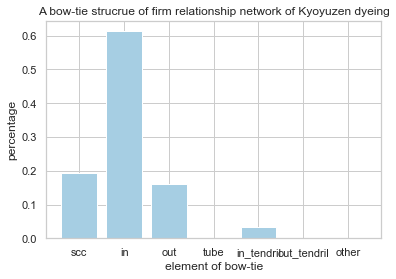

In [289]:
draw_bar(1)

3-7-node数: 105
SCCの大きさは 23
INの大きさは 55
OUTの大きさは 12
TUBEの大きさは 0
IN_TENDRILSの大きさは 7
OUT_TENDRILSの大きさは 7
OTHERの大きさは 1
SCCの割合は21.90%
INの割合は52.38%
OUTの割合は11.43%
TUBEの割合は0.00%
IN_TENDRILSの割合は6.67%
OUT_TENDRILSの割合は6.67%
OTHERの割合は0.95%


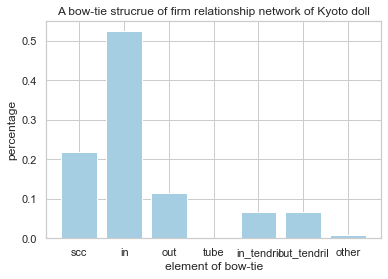

In [288]:
draw_bar(2)

1-10-node数: 173
SCCの大きさは 20
INの大きさは 142
OUTの大きさは 7
TUBEの大きさは 0
IN_TENDRILSの大きさは 2
OUT_TENDRILSの大きさは 2
OTHERの大きさは 0
SCCの割合は11.56%
INの割合は82.08%
OUTの割合は4.05%
TUBEの割合は0.00%
IN_TENDRILSの割合は1.16%
OUT_TENDRILSの割合は1.16%
OTHERの割合は0.00%


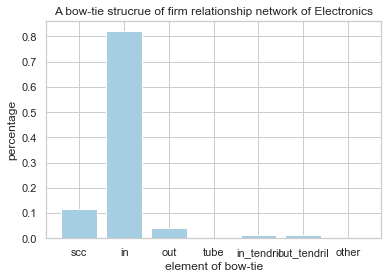

In [287]:
draw_bar(3)

2-10-node数: 65
SCCの大きさは 5
INの大きさは 45
OUTの大きさは 8
TUBEの大きさは 0
IN_TENDRILSの大きさは 0
OUT_TENDRILSの大きさは 7
OTHERの大きさは 0
SCCの割合は7.69%
INの割合は69.23%
OUTの割合は12.31%
TUBEの割合は0.00%
IN_TENDRILSの割合は0.00%
OUT_TENDRILSの割合は10.77%
OTHERの割合は0.00%


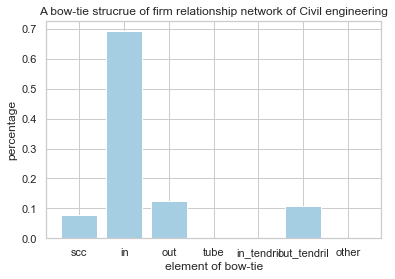

In [286]:
draw_bar(4)

3-1-1-node数: 121
SCCの大きさは 30
INの大きさは 74
OUTの大きさは 13
TUBEの大きさは 1
IN_TENDRILSの大きさは 1
OUT_TENDRILSの大きさは 2
OTHERの大きさは 0
SCCの割合は24.79%
INの割合は61.16%
OUTの割合は10.74%
TUBEの割合は0.83%
IN_TENDRILSの割合は0.83%
OUT_TENDRILSの割合は1.65%
OTHERの割合は0.00%


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


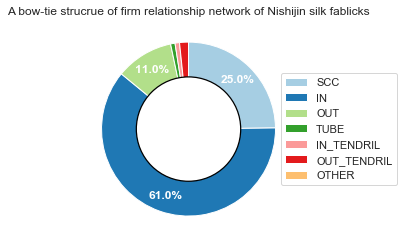

In [292]:
draw_pie_graph(0)

3-1-30-node数: 31
SCCの大きさは 6
INの大きさは 19
OUTの大きさは 5
TUBEの大きさは 0
IN_TENDRILSの大きさは 1
OUT_TENDRILSの大きさは 0
OTHERの大きさは 0
SCCの割合は19.35%
INの割合は61.29%
OUTの割合は16.13%
TUBEの割合は0.00%
IN_TENDRILSの割合は3.23%
OUT_TENDRILSの割合は0.00%
OTHERの割合は0.00%


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


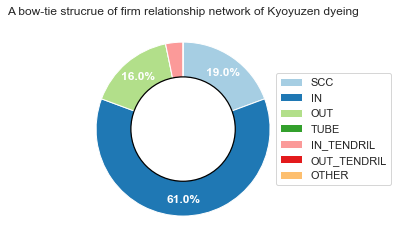

In [293]:
draw_pie_graph(1)

3-7-node数: 105
SCCの大きさは 23
INの大きさは 55
OUTの大きさは 12
TUBEの大きさは 0
IN_TENDRILSの大きさは 7
OUT_TENDRILSの大きさは 7
OTHERの大きさは 1
SCCの割合は21.90%
INの割合は52.38%
OUTの割合は11.43%
TUBEの割合は0.00%
IN_TENDRILSの割合は6.67%
OUT_TENDRILSの割合は6.67%
OTHERの割合は0.95%


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


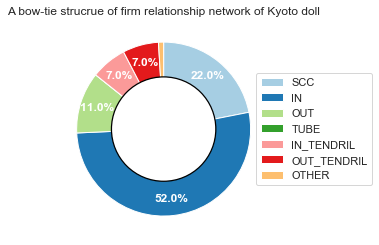

In [294]:
draw_pie_graph(2)

1-10-node数: 173
SCCの大きさは 20
INの大きさは 142
OUTの大きさは 7
TUBEの大きさは 0
IN_TENDRILSの大きさは 2
OUT_TENDRILSの大きさは 2
OTHERの大きさは 0
SCCの割合は11.56%
INの割合は82.08%
OUTの割合は4.05%
TUBEの割合は0.00%
IN_TENDRILSの割合は1.16%
OUT_TENDRILSの割合は1.16%
OTHERの割合は0.00%


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


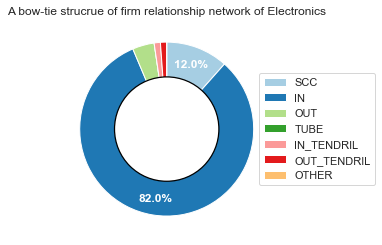

In [295]:
draw_pie_graph(3)

2-10-node数: 65
SCCの大きさは 5
INの大きさは 45
OUTの大きさは 8
TUBEの大きさは 0
IN_TENDRILSの大きさは 0
OUT_TENDRILSの大きさは 7
OTHERの大きさは 0
SCCの割合は7.69%
INの割合は69.23%
OUTの割合は12.31%
TUBEの割合は0.00%
IN_TENDRILSの割合は0.00%
OUT_TENDRILSの割合は10.77%
OTHERの割合は0.00%


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


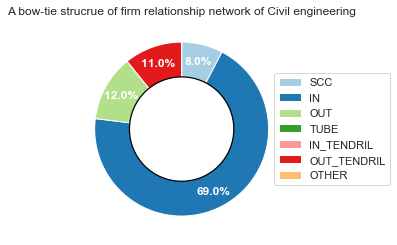

In [296]:
draw_pie_graph(4)

In [212]:
def plot_bowtie_ration_each_community():
    sns.set()
    sns.set_style("whitegrid")
    sns.set_palette("Paired")
    
    width = 0.4
    margin = 0.2
    
    num_sample = 5
    num_item_per_sample = 7
    
    block = width * num_sample + margin
    
    ind = np.arange(num_item_per_sample) * block
 
    
    x = np.array(["scc", "in", "out", "tube", "in_tendril", "out_tendril", "other"])
    x_position = np.arange(len(x))
    
    y_3_1_1 = np.array(list(info_each_community[0].values()))[0]
    y_3_1_30 = np.array(list(info_each_community[1].values()))[0]
    y_3_7 = np.array(list(info_each_community[2].values()))[0]
    y_1_10 = np.array(list(info_each_community[3].values()))[0]
    y_2_10 = np.array(list(info_each_community[4].values()))[0]
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.bar(ind, y_3_1_1, width=0.4, label="Nishijin silk fablicks")
    ax.bar(ind + 0.4, y_3_1_30, width=0.4, label="Kyoyuzen dyeing")
    ax.bar(ind+ 0.8, y_3_7, width=0.4, label="Kyoto doll")
    ax.bar(ind+ 1.2, y_1_10, width=0.4, label="Electronics")
    ax.bar(ind+ 1.6, y_2_10, width=0.4, label="Civil engineering")
    ax.legend()
    
    xlocs = ind + width * num_sample / 2. 
    ax.set_xticks(xlocs)
    ax.set_xticklabels(x)
    plt.show()
   

### TODO
- 京都のbow-tieグラフの割合を円グラフで表す。
- 京都のbow-tieのどこに各産業が埋まっているのかを棒グラフで表す
- 各産業のbow-tieグラフの構成を円グラフで示す？ 

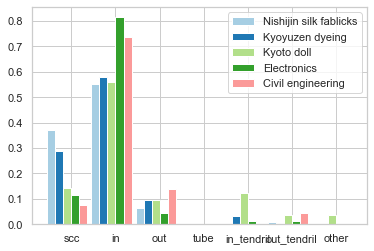

In [213]:
plot_bowtie_ration_each_community()

SCCの割合は7.69%
INの割合は73.85%
OUTの割合は13.85%
TUBEの割合は0.00%
IN_TENDRILSの割合は0.00%
OUT_TENDRILSの割合は4.62%
OTHERの割合は0.00%


([<matplotlib.patches.Wedge at 0x1a298554a8>,
 [Text(0.26324724033138536, 1.068035996798755, 'SCC'),
  Text(0.36509856894094356, -1.0376430190375086, 'IN'),
  Text(-0.729434811396772, 0.8233619228034266, 'OUT'),
  Text(-0.31454007998521893, 1.054070461630954, 'TUBE'),
  Text(-0.31454007998521893, 1.054070461630954, 'IN_TENDRIL'),
  Text(-0.15893777951754212, 1.0884570649511323, 'OUT_TENDRIL'),
  Text(1.8023150729406385e-07, 1.0999999999999852, 'OTHER')],
 [Text(0.14358940381711927, 0.5825650891629571, '7.7%'),
  Text(0.19914467396778737, -0.5659871012931864, '73.8%'),
  Text(-0.39787353348914833, 0.44910650334732355, '13.8%'),
  Text(-0.17156731635557393, 0.5749475245259748, '0.0%'),
  Text(-0.17156731635557393, 0.5749475245259748, '0.0%'),
  Text(-0.08669333428229568, 0.5937038536097085, '4.6%'),
  Text(9.830809488767119e-08, 0.5999999999999919, '0.0%')])

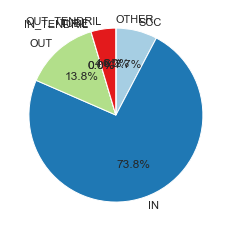

In [230]:
"""京都のbowtieの構造を円グラフで表す"""
scc_ratio, inc_ratio, outc_ratio, tube_ratio, intendril_ratio, outtendril_ratio, other_ratio = culculate_bow_tie_ratio(scc, inc, outc, tube, in_tendril, out_tendril, other, graph)
x = np.array([scc_ratio, inc_ratio, outc_ratio, tube_ratio, intendril_ratio, outtendril_ratio, other_ratio])
label = ["SCC", "IN", "OUT", "TUBE", "IN_TENDRIL", "OUT_TENDRIL", "OTHER"]
plt.pie(x, labels=label, counterclock=False, startangle=90, autopct="%1.1f%%")

SCCの割合は10.89%
INの割合は52.25%
OUTの割合は11.55%
TUBEの割合は0.72%
IN_TENDRILSの割合は8.93%
OUT_TENDRILSの割合は9.79%
OTHERの割合は5.88%


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


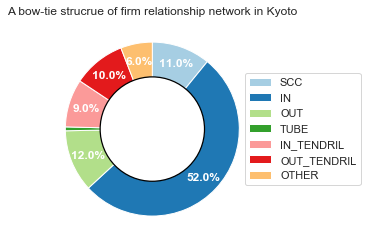

In [305]:
"""値が0のものを消す"""
scc_ratio, inc_ratio, outc_ratio, tube_ratio, intendril_ratio, outtendril_ratio, other_ratio = culculate_bow_tie_ratio(scc, inc, outc, tube, in_tendril, out_tendril, other, G)
x = np.array([scc_ratio, inc_ratio, outc_ratio, tube_ratio, intendril_ratio, outtendril_ratio, other_ratio])
label = ["SCC", "IN", "OUT", "TUBE", "IN_TENDRIL", "OUT_TENDRIL", "OTHER"]
plt.pie(x, counterclock=False, startangle=90, autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 5 else "", textprops={"color": "white",'weight': "bold"},  pctdistance=0.8)
plt.subplots_adjust(left=0,right=0.7)
plt.legend(label,fancybox=True,loc='center left',bbox_to_anchor=(0.9,0.5))
plt.title("A bow-tie strucrue of firm relationship network in Kyoto")

centre_circle = plt.Circle((0,0),0.6,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.show()

Text(0, 0.5, 'percentage')

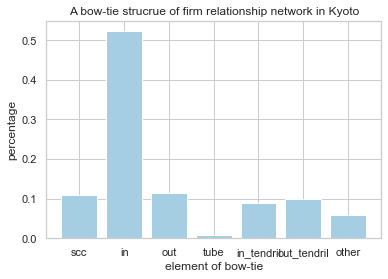

In [306]:
x = np.array(["scc", "in", "out", "tube", "in_tendril", "out_tendril", "other"])
y = np.array([scc_ratio, inc_ratio, outc_ratio, tube_ratio, intendril_ratio, outtendril_ratio, other_ratio])
plt.bar(x, y)
plt.title("A bow-tie strucrue of firm relationship network in Kyoto")
plt.xlabel("element of bow-tie")
plt.ylabel("percentage")

In [304]:
len(G.nodes())

80508

In [308]:
len(scc)

8765